#### Perform chi2 test 
- loan data

In [18]:
import pandas as pd
import numpy as np

import math

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style="white", color_codes=True)

In [19]:
location = r'D:\AI-DATASETS\01-MISC\loan_data_set.csv'

In [20]:
loan = pd.read_csv(location)

#Dropping the uninformative feature
loan.drop(['Loan_ID'], axis=1, inplace=True)

loan.shape

(614, 12)

In [21]:
loan.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [22]:
# loan.isnull().sum()

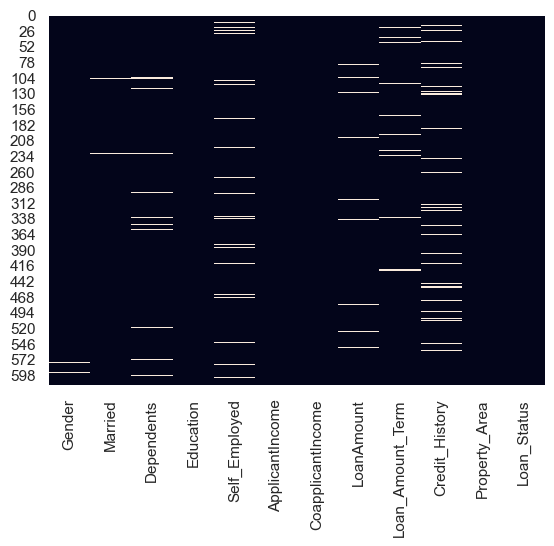

In [23]:
sns.heatmap(loan.isnull(), cbar=False);

In [24]:
loan.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [25]:
#Dropping all the null value
loan.dropna(inplace = True)

In [26]:
#Transform the numerical feature into categorical feature (for chi2 test)
loan['Loan_Amount_Term'] = loan['Loan_Amount_Term'].astype('object')
loan['Credit_History']   = loan['Credit_History'].astype('object')

In [27]:
#Getting all the categorical columns except the target
categorical_columns = loan.select_dtypes(exclude = 'number').drop('Loan_Status', axis = 1).columns

In [28]:
categorical_columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [29]:
pd.crosstab(loan['Gender'], loan['Loan_Status'])

Loan_Status,N,Y
Gender,,
Female,32,54
Male,116,278


Null hypothesis = no association between gender and loan_status columns


In [33]:
# Import the function
from scipy.stats import chi2_contingency

In [34]:
# Testing the relationship
chi_res = chi2_contingency(pd.crosstab(loan['Loan_Status'], loan['Gender']))

In [35]:
print('Chi2 Statistic: {}, p-value: {}'.format(chi_res[0], chi_res[1]))

Chi2 Statistic: 1.6495637942018446, p-value: 0.19901831142812107


here p-value is not less than 0.05, so we cannot reject the null hypothesis

i.e. there is NO association between gender col and loan_status

#### test with all the categorical features present

In [36]:
chi2_check = []

for i in categorical_columns:
    
    if chi2_contingency(pd.crosstab(loan['Loan_Status'], loan[i]))[1] < 0.05:
        pP')
    else:
        chi2_check.append('Fail to Reject Null Hypothesis; DROP')
        
res = pd.DataFrame({'column': categorical_columns, 'Test result': chi2_check})

res

,column,Test result
0,Gender,Fail to Reject Null Hypothesis; DROP
1,Married,Reject Null Hypothesis; KEEP
2,Dependents,Fail to Reject Null Hypothesis; DROP
3,Education,Fail to Reject Null Hypothesis; DROP
4,Self_Employed,Fail to Reject Null Hypothesis; DROP
5,Loan_Amount_Term,Reject Null Hypothesis; KEEP
6,Credit_History,Reject Null Hypothesis; KEEP
7,Property_Area,Reject Null Hypothesis; KEEP


In [87]:
pd.crosstab(loan['Loan_Status'], loan['Loan_Amount_Term'])

Loan_Amount_Term,36.0,60.0,84.0,120.0,180.0,240.0,300.0,360.0,480.0
Loan_Status,,,,,,,,,
N,2,0,1,0,12,1,5,119,8
Y,0,2,2,3,24,1,4,292,4
